In [1]:
import numpy as np
import pandas as pd
from PIL import Image as pilImg
import os 
import cv2
from datetime import datetime
import matplotlib.pyplot as plt
import itertools

In [2]:
def Extract_image_names(file_path,number):
    with open(file_path) as f:
        file_names=f.readlines()
        f.close()
        count=0
        img_names=[]
        for file in file_names:
            _,label,_=file.split('_')
            if len(label)>=4 and len(label)<=12:
                img_names.append(file)
                count+=1
            if count==number:
                break
        images_names=['SynthImageDataset'+x.strip() for x in img_names]
        return images_names

In [3]:
train_images= Extract_image_names('SynthImageDataset/annotation_train.txt',200000)

In [4]:
train_images[:5]

['SynthImageDataset./2424/7/179_CARAFES_11435.jpg 11435',
 'SynthImageDataset./2424/7/178_alsace_2243.jpg 2243',
 'SynthImageDataset./2424/7/177_Runarounds_67087.jpg 67087',
 'SynthImageDataset./2424/7/176_HABITABILITY_34434.jpg 34434',
 'SynthImageDataset./2424/7/175_REORIENT_64709.jpg 64709']

In [5]:
def clean_file_names(file_names):
    clean_files=[]
    for file in file_names:
        main_folder,img_loc,extension=file.split('.')
        extension,_=extension.split(' ')
        img_file=main_folder+img_loc+'.'+extension
        clean_files.append(img_file)
    return clean_files

In [6]:
train_cleaned=clean_file_names(train_images)

In [7]:
train_cleaned[:5]

['SynthImageDataset/2424/7/179_CARAFES_11435.jpg',
 'SynthImageDataset/2424/7/178_alsace_2243.jpg',
 'SynthImageDataset/2424/7/177_Runarounds_67087.jpg',
 'SynthImageDataset/2424/7/176_HABITABILITY_34434.jpg',
 'SynthImageDataset/2424/7/175_REORIENT_64709.jpg']

In [8]:
train_data=pd.DataFrame({'ImageName':train_cleaned})

In [9]:
train_data.head()

,ImageName
0,SynthImageDataset/2424/7/179_CARAFES_11435.jpg
1,SynthImageDataset/2424/7/178_alsace_2243.jpg
2,SynthImageDataset/2424/7/177_Runarounds_67087.jpg
3,SynthImageDataset/2424/7/176_HABITABILITY_3443...
4,SynthImageDataset/2424/7/175_REORIENT_64709.jpg


In [10]:
def extract_ground_truth(files):
    txt_labels=[]
    for file in files:
        folder,ground_truth,image=file.split('_')
        ground_truth=ground_truth.upper()
        txt_labels.append(ground_truth)
    return txt_labels        

In [11]:
Train_ground_truths=extract_ground_truth(train_cleaned)

In [12]:
train_data['Labels']=Train_ground_truths

In [13]:
train_data.head()

,ImageName,Labels
0,SynthImageDataset/2424/7/179_CARAFES_11435.jpg,CARAFES
1,SynthImageDataset/2424/7/178_alsace_2243.jpg,ALSACE
2,SynthImageDataset/2424/7/177_Runarounds_67087.jpg,RUNAROUNDS
3,SynthImageDataset/2424/7/176_HABITABILITY_3443...,HABITABILITY
4,SynthImageDataset/2424/7/175_REORIENT_64709.jpg,REORIENT


In [14]:
train_data.to_csv('Train_data.csv')

In [15]:
Validation_images=Extract_image_names('SynthImageDataset/annotation_val.txt',12000)

In [16]:
val_cleaned=clean_file_names(Validation_images)

In [17]:
val_data=pd.DataFrame({'ImageName':val_cleaned})

In [18]:
val_data.head()

,ImageName
0,SynthImageDataset/2697/3/198_Vestment_84447.jpg
1,SynthImageDataset/2697/3/197_Jeroboam_41434.jpg
2,SynthImageDataset/2697/3/196_ESCHERICHIA_26513...
3,SynthImageDataset/2697/3/195_Restores_65348.jpg
4,SynthImageDataset/2697/3/194_TOURNIQUETS_79897...


In [19]:
Val_ground_truths=extract_ground_truth(val_cleaned)

In [20]:
val_data['Labels']=Val_ground_truths

In [21]:
val_data.head()

,ImageName,Labels
0,SynthImageDataset/2697/3/198_Vestment_84447.jpg,VESTMENT
1,SynthImageDataset/2697/3/197_Jeroboam_41434.jpg,JEROBOAM
2,SynthImageDataset/2697/3/196_ESCHERICHIA_26513...,ESCHERICHIA
3,SynthImageDataset/2697/3/195_Restores_65348.jpg,RESTORES
4,SynthImageDataset/2697/3/194_TOURNIQUETS_79897...,TOURNIQUETS


In [22]:
val_data.to_csv('Validation_data.csv')

In [23]:
test_images=Extract_image_names('SynthImageDataset/annotation_test.txt',15000)

In [24]:
test_cleaned=clean_file_names(test_images)

In [25]:
test_data=pd.DataFrame({'ImageName':test_cleaned})

In [26]:
test_data.head()

,ImageName
0,SynthImageDataset/3000/3/501_BASEMAN_6130.jpg
1,SynthImageDataset/3000/3/500_DIRECTS_21860.jpg
2,SynthImageDataset/3000/3/499_lidless_44360.jpg
3,SynthImageDataset/3000/3/498_riposte_66210.jpg
4,SynthImageDataset/3000/3/497_Smudges_72069.jpg


In [27]:
test_ground_truths=extract_ground_truth(test_cleaned)

In [28]:
test_data['Labels']=test_ground_truths

In [29]:
test_data.head()

,ImageName,Labels
0,SynthImageDataset/3000/3/501_BASEMAN_6130.jpg,BASEMAN
1,SynthImageDataset/3000/3/500_DIRECTS_21860.jpg,DIRECTS
2,SynthImageDataset/3000/3/499_lidless_44360.jpg,LIDLESS
3,SynthImageDataset/3000/3/498_riposte_66210.jpg,RIPOSTE
4,SynthImageDataset/3000/3/497_Smudges_72069.jpg,SMUDGES


In [30]:
test_data.to_csv('Test_data.csv')

In [163]:
def img_store_single_channel(destination_folder,files):
    start=datetime.datetime.now()
    destination_list=[]
    count=1
    for file in files:
        print(file)
        _,_,_,Name=file.split('/')
        _,img,_=Name.split('_')
        destination=destination_folder+str(count)+'_'+img+'.jpg'
        cv_img=cv2.imread(file)
        #cv_img_sc=cv_resized[:,:,1]
        cv_img_sc=cv_img[:,:,1]
        cv2.imwrite(destination,cv_img_sc)
        destination_list.append(destination)
        count+=1
#         if count%10000==0:
#             print("Processed Images: ",count)
    print('Time Taken for Processing: ',datetime.datetime.now() - start)
    return destination_list

In [32]:
train_data=pd.read_csv('Train_data.csv')

In [33]:
train_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [34]:
train_files=train_data['ImageName'].values
print(train_files)

['SynthImageDataset/2424/7/179_CARAFES_11435.jpg'
 'SynthImageDataset/2424/7/178_alsace_2243.jpg'
 'SynthImageDataset/2424/7/177_Runarounds_67087.jpg' ...
 'SynthImageDataset/2417/6/3_sewed_69744.jpg'
 'SynthImageDataset/2417/6/2_ROOFTOP_66594.jpg'
 'SynthImageDataset/2417/6/1_THROW_78872.jpg']


In [164]:
train_dest=img_store_single_channel('Train_data/',train_files)

SynthImageDataset/2424/7/179_CARAFES_11435.jpg
SynthImageDataset/2424/7/178_alsace_2243.jpg
SynthImageDataset/2424/7/177_Runarounds_67087.jpg
SynthImageDataset/2424/7/176_HABITABILITY_34434.jpg
SynthImageDataset/2424/7/175_REORIENT_64709.jpg
SynthImageDataset/2424/7/174_Leaders_43738.jpg
SynthImageDataset/2424/7/173_stability_74046.jpg
SynthImageDataset/2424/7/172_Backlogged_5362.jpg
SynthImageDataset/2424/7/171_reasoned_62899.jpg
SynthImageDataset/2424/7/170_OUTSTANDING_54218.jpg
SynthImageDataset/2424/7/169_Sycophants_76918.jpg
SynthImageDataset/2424/7/168_bullock_10148.jpg
SynthImageDataset/2424/7/167_EGGPLANT_24785.jpg
SynthImageDataset/2424/7/166_Dressier_23764.jpg
SynthImageDataset/2424/7/165_BIORHYTHMS_7600.jpg
SynthImageDataset/2424/7/164_Promote_60526.jpg
SynthImageDataset/2424/7/163_Shinbone_70218.jpg
SynthImageDataset/2424/7/162_butted_10512.jpg
SynthImageDataset/2424/7/161_sagebrush_67368.jpg
SynthImageDataset/2424/7/160_curbing_18678.jpg
SynthImageDataset/2424/7/159_Debunk

In [166]:
train_data['ImageName']=train_dest

In [168]:
train_data.head()

,Unnamed: 0,ImageName,Labels
0,0,Train_Data/1_CARAFES.jpg,CARAFES
1,1,Train_Data/2_alsace.jpg,ALSACE
2,2,Train_Data/3_Runarounds.jpg,RUNAROUNDS
3,3,Train_Data/4_HABITABILITY.jpg,HABITABILITY
4,4,Train_Data/5_REORIENT.jpg,REORIENT


In [38]:
train_data.to_csv('Train_Final.csv')

In [39]:
val_data=pd.read_csv('Validation_data.csv')

In [40]:
val_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [41]:
val_files=val_data['ImageName'].values

In [42]:
val_dest=img_store_single_channel('Val_Data/',val_files)

SynthImageDataset/2697/3/198_Vestment_84447.jpg
SynthImageDataset/2697/3/197_Jeroboam_41434.jpg
SynthImageDataset/2697/3/196_ESCHERICHIA_26513.jpg
SynthImageDataset/2697/3/195_Restores_65348.jpg
SynthImageDataset/2697/3/194_TOURNIQUETS_79897.jpg
SynthImageDataset/2697/3/192_Imperatives_38258.jpg
SynthImageDataset/2697/3/191_thais_78443.jpg
SynthImageDataset/2697/3/190_MISTREAT_49116.jpg
SynthImageDataset/2697/3/189_Wobbliness_86985.jpg
SynthImageDataset/2697/3/187_Sills_70948.jpg
SynthImageDataset/2697/3/186_Clarinets_13946.jpg
SynthImageDataset/2697/3/185_BUTTED_10512.jpg
SynthImageDataset/2697/3/184_gallantly_31556.jpg
SynthImageDataset/2697/3/183_DRENCHING_23756.jpg
SynthImageDataset/2697/3/182_MOUNTED_50069.jpg
SynthImageDataset/2697/3/181_maxed_47245.jpg
SynthImageDataset/2697/3/179_Overcasts_54356.jpg
SynthImageDataset/2697/3/178_aped_3356.jpg
SynthImageDataset/2697/3/177_UNLOCKS_82835.jpg
SynthImageDataset/2697/3/176_asphyxiating_4302.jpg
SynthImageDataset/2697/3/175_nadirs_5075

In [43]:
val_data['ImageName']=val_dest

In [44]:
val_data.head()

,ImageName,Labels
0,Val_data/1_Vestment.jpg,VESTMENT
1,Val_data/2_Jeroboam.jpg,JEROBOAM
2,Val_data/3_ESCHERICHIA.jpg,ESCHERICHIA
3,Val_data/4_Restores.jpg,RESTORES
4,Val_data/5_TOURNIQUETS.jpg,TOURNIQUETS


In [45]:
val_data.to_csv('Validation_Final.csv')

**Processing Test Data**

In [46]:
test_data=pd.read_csv('Test_data.csv')

In [47]:
test_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [48]:
test_files=test_data['ImageName'].values

In [49]:
test_dest=img_store_single_channel('Test_Data/',test_files)

SynthImageDataset/3000/3/501_BASEMAN_6130.jpg
SynthImageDataset/3000/3/500_DIRECTS_21860.jpg
SynthImageDataset/3000/3/499_lidless_44360.jpg
SynthImageDataset/3000/3/498_riposte_66210.jpg
SynthImageDataset/3000/3/497_Smudges_72069.jpg
SynthImageDataset/3000/3/496_Reshaping_65136.jpg
SynthImageDataset/3000/3/495_STEEPLEJACKS_74509.jpg
SynthImageDataset/3000/3/494_viscous_84802.jpg
SynthImageDataset/3000/3/493_Procurators_60298.jpg
SynthImageDataset/3000/3/492_PACTS_54955.jpg
SynthImageDataset/3000/3/491_Infestation_39318.jpg
SynthImageDataset/3000/3/490_testes_78364.jpg
SynthImageDataset/3000/3/489_BEGGARING_6702.jpg
SynthImageDataset/3000/3/488_obstructed_52917.jpg
SynthImageDataset/3000/3/487_PERSIAN_56846.jpg
SynthImageDataset/3000/3/486_sash_67822.jpg
SynthImageDataset/3000/3/485_Tanager_77411.jpg
SynthImageDataset/3000/3/484_Sprucing_73824.jpg
SynthImageDataset/3000/3/483_Myxomatosis_50733.jpg
SynthImageDataset/3000/3/482_DAMN_19117.jpg
SynthImageDataset/3000/3/481_fortitude_30445.j

In [50]:
test_data['ImageName']=test_dest

In [51]:
test_data.head()

,ImageName,Labels
0,Test_data/1_BASEMAN.jpg,BASEMAN
1,Test_data/2_DIRECTS.jpg,DIRECTS
2,Test_data/3_lidless.jpg,LIDLESS
3,Test_data/4_riposte.jpg,RIPOSTE
4,Test_data/5_Smudges.jpg,SMUDGES


In [52]:
test_data.to_csv('Test_Final.csv')

## 7. Exploratory Data Analysis

In [53]:
train_data=pd.read_csv('Train_data.csv')
val_data=pd.read_csv('Validation_Data.csv')
test_data=pd.read_csv('Test_Data.csv')

In [54]:
def Write_Image_Sizes(filenames,storage_file):
    store_file=open(storage_file,'w+')
    store_file.write("ImageName,Height,Width")
    store_file.write("\n")
    cnt=0
    for file in filenames:
        cv_img=cv2.imread(file)
        store_file.write(str(file)+","+str(cv_img.shape[0])+","+str(cv_img.shape[1]))
        store_file.write("\n")
        cnt+=1
        if cnt%10000==0:
            print("Processed Images: ",cnt)
    store_file.close()       

In [55]:
train_image_names=list(train_data['ImageName'].values)
val_image_names=list(val_data['ImageName'].values)
test_image_names=list(test_data['ImageName'].values)

In [56]:
Write_Image_Sizes(train_image_names,'Train_image_sizes.csv')

Processed Images:  10000


In [57]:
Write_Image_Sizes(val_image_names,'Validation_image_sizes.csv')

In [58]:
Write_Image_Sizes(test_image_names,'Test_image_sizes.csv')

In [59]:
train_img_size=pd.read_csv('Train_image_sizes.csv')
val_img_size=pd.read_csv('Validation_image_sizes.csv')
test_img_size=pd.read_csv('Test_image_sizes.csv')

In [60]:
train_img_size.describe()

,Height,Width
count,17889.000000,17889.000000
mean,31.034435,116.197384
std,0.388278,40.368815
min,13.000000,1.000000
25%,31.000000,88.000000
50%,31.000000,110.000000
75%,31.000000,137.000000
max,32.000000,608.000000


In [61]:
val_img_size.describe()

,Height,Width
count,1107.000000,1107.000000
mean,31.035230,116.242096
std,0.317691,38.902776
min,23.000000,39.000000
25%,31.000000,89.000000
50%,31.000000,111.000000
75%,31.000000,136.000000
max,32.000000,336.000000


In [62]:
test_img_size.describe()

,Height,Width
count,1386.000000,1386.000000
mean,31.025974,115.896104
std,0.725535,40.870731
min,6.000000,40.000000
25%,31.000000,88.000000
50%,31.000000,109.000000
75%,31.000000,135.000000
max,32.000000,464.000000


In [64]:
for i in range(10):
    print("Train Images Width "+str(90+i)+ " percentile :",np.percentile(train_img_size['Width'].values,90+i))
print("="*60)
for i in range(10):
    print("Validation Images Width "+str(90+i)+ " percentile :",np.percentile(val_img_size['Width'].values,90+i))
print("="*60)
for i in range(10):
    print("Test Images Width "+str(90+i)+ " percentile :",np.percentile(test_img_size['Width'].values,90+i))
    

Train Images Width 90 percentile : 167.0
Train Images Width 91 percentile : 171.0
Train Images Width 92 percentile : 174.0
Train Images Width 93 percentile : 179.0
Train Images Width 94 percentile : 184.0
Train Images Width 95 percentile : 190.0
Train Images Width 96 percentile : 198.0
Train Images Width 97 percentile : 208.0
Train Images Width 98 percentile : 221.23999999999796
Train Images Width 99 percentile : 242.0
Validation Images Width 90 percentile : 164.0
Validation Images Width 91 percentile : 167.0
Validation Images Width 92 percentile : 170.0
Validation Images Width 93 percentile : 174.0
Validation Images Width 94 percentile : 184.27999999999975
Validation Images Width 95 percentile : 189.0
Validation Images Width 96 percentile : 196.0
Validation Images Width 97 percentile : 203.0
Validation Images Width 98 percentile : 215.75999999999976
Validation Images Width 99 percentile : 237.64000000000033
Test Images Width 90 percentile : 167.0
Test Images Width 91 percentile : 171.

In [65]:
def cdf_image_heights(label_len):
    plt.figure(figsize=(10,6))
    count_labels=np.array(label_len)
    counts, bin_edges = np.histogram(count_labels, bins=8, 
                                 density = True)
    pdf = counts/(sum(counts))
    cdf=np.cumsum(pdf)
    plt.plot(bin_edges[1:],cdf)
    plt.xlabel('Height of Images',fontsize=10)
    plt.ylabel('CDF',fontsize=10)
    plt.title('CDF Plot of Image Height',fontsize=12)
    plt.show()

In [66]:
def cdf_image_widths(label_len):
    plt.figure(figsize=(10,6))
    count_labels=np.array(label_len)
    counts, bin_edges = np.histogram(count_labels, bins=8, 
                                 density = True)
    pdf = counts/(sum(counts))
    cdf=np.cumsum(pdf)
    plt.plot(bin_edges[1:],cdf)
    plt.xlabel('Width of Images',fontsize=10)
    plt.ylabel('CDF',fontsize=10)
    plt.title('CDF Plot of Image Width',fontsize=12)
    plt.show()

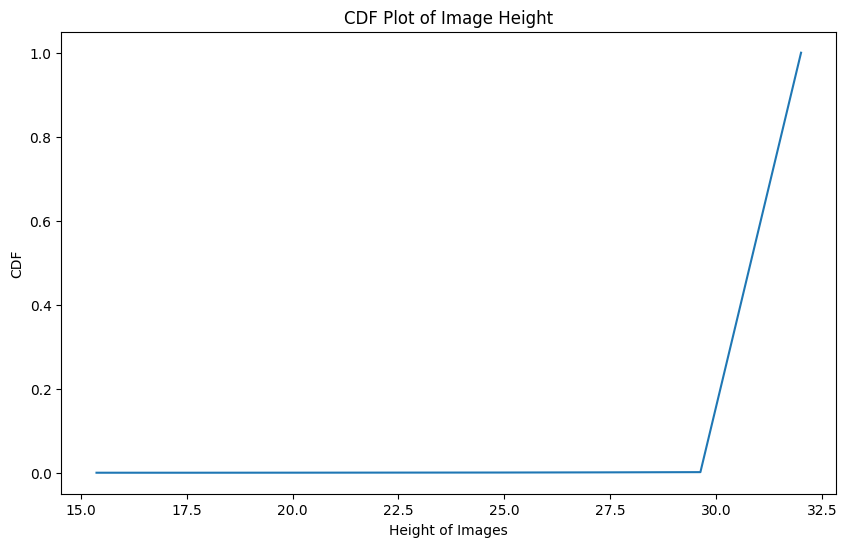

In [67]:
cdf_image_heights(train_img_size['Height'].values)

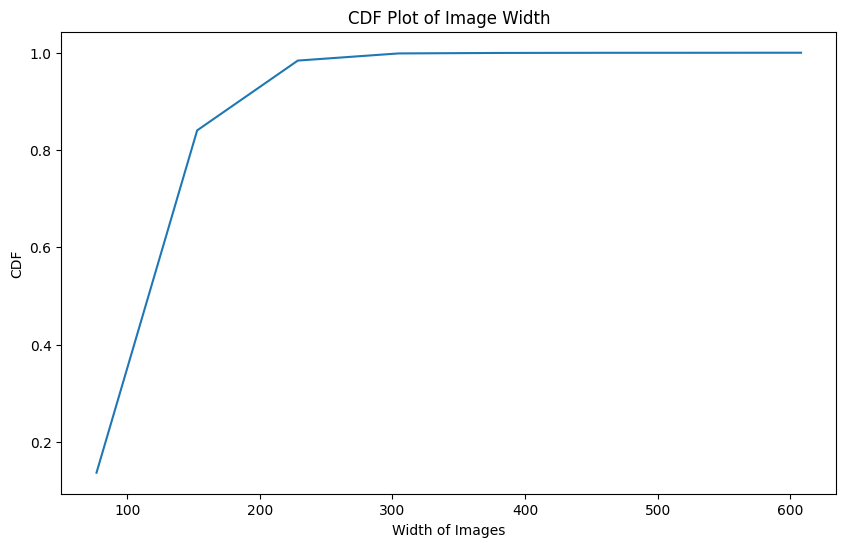

In [68]:
cdf_image_widths(train_img_size['Width'].values)

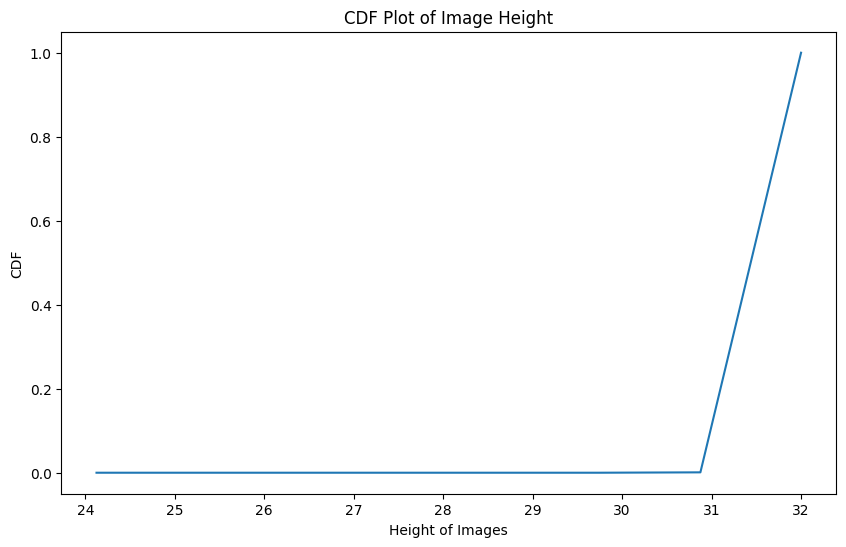

In [69]:
cdf_image_heights(val_img_size['Height'].values)

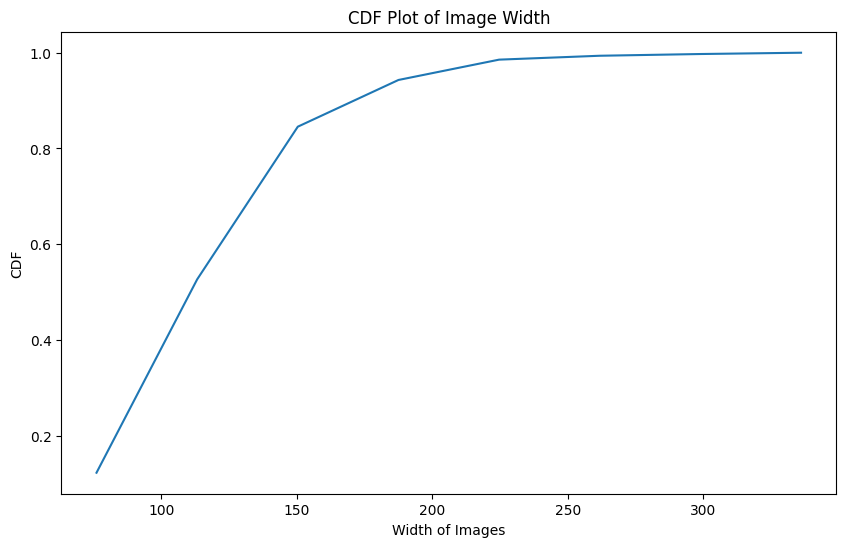

In [70]:
cdf_image_widths(val_img_size['Width'].values)

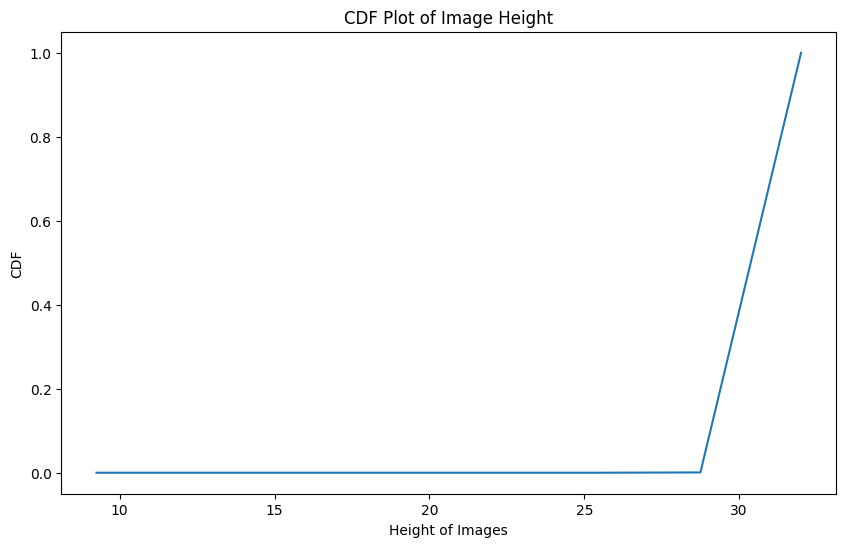

In [71]:
cdf_image_heights(test_img_size['Height'].values)

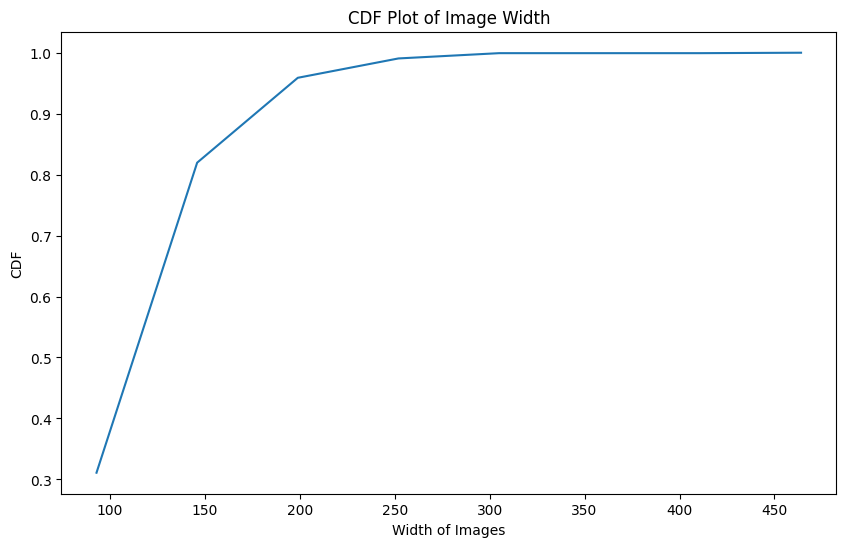

In [72]:
cdf_image_widths(test_img_size['Width'].values)

In [73]:
def pdf_label_lengths(label_len):
    plt.figure(figsize=(10,6))
    count_labels=np.array(label_len)
    counts, bin_edges = np.histogram(count_labels, bins=8, density = True)
    pdf = counts/(sum(counts))
    plt.plot(bin_edges[1:],pdf)
    plt.xlabel('Length of Labels',fontsize=10)
    plt.ylabel('PDF',fontsize=10)
    plt.title('PDF Plot of lengths of Labels',fontsize=12)
    max_len=max(label_len)
    plt.show()
    print('-'*100)
    print('Maximum Length of Label: ',max_len)
    print('-'*100)

In [74]:
def cdf_label_lengths(label_len):
    plt.figure(figsize=(10,6))
    count_labels=np.array(label_len)
    counts, bin_edges = np.histogram(count_labels, bins=8, 
                                 density = True)
    pdf = counts/(sum(counts))
    cdf=np.cumsum(pdf)
    plt.plot(bin_edges[1:],cdf)
    plt.xlabel('Length of Labels',fontsize=10)
    plt.ylabel('CDF',fontsize=10)
    plt.title('CDF Plot of lengths of Labels',fontsize=12)
    plt.show()

In [75]:
def top_5_lengths_percentage(label_len,counts,total):
    plt.figure(figsize=(10,6))
    indices=np.arange(len(label_len))
    counts=np.array(counts)
    percent=(counts/total)*100
    plt.bar(indices,percent)
    plt.xlabel('Label Lengths',fontsize=10)
    plt.ylabel('Percentages',fontsize=10)
    plt.title('Percentages of Top 5 lengths of Labels',fontsize=12)
    plt.xticks(indices,label_len)
    plt.show()    

In [76]:
import re
def hasDigits(inputText):
    return bool(re.search(r'\d', inputText))

In [77]:
def digit_count(labels,size):
    present=0
    absent=0
    for i in labels:
        pres=hasDigits(i)
        if pres==True:
            present+=1
        else:
            absent+=1
    present_percent=(present/size)*100
    absent_percent=(absent/size)*100
    print('Labels with Digits: ',present_percent,' %')
    print('Labels without Digits: ',absent_percent,' %')        

In [78]:
train_data=pd.read_csv('Train_data.csv')

In [79]:
train_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [80]:
train_label_len=[len(str(x)) for x in train_data['Labels'].values]

In [81]:
train_data.to_csv('Train_Final.csv')

In [82]:
from collections import Counter

In [83]:
train_label_len_dict=Counter(train_label_len)

In [84]:
train_label_len_dict

Counter({7: 2973,
         6: 2286,
         10: 2195,
         12: 912,
         8: 3047,
         9: 2722,
         11: 1416,
         5: 1512,
         4: 826})

In [85]:
train_keys = [k for k in sorted(train_label_len_dict, key=train_label_len_dict.get, reverse=True)]

In [86]:
train_top_keys=train_keys[:5]
train_top_values=[train_label_len_dict.get(k) for k in train_top_keys]

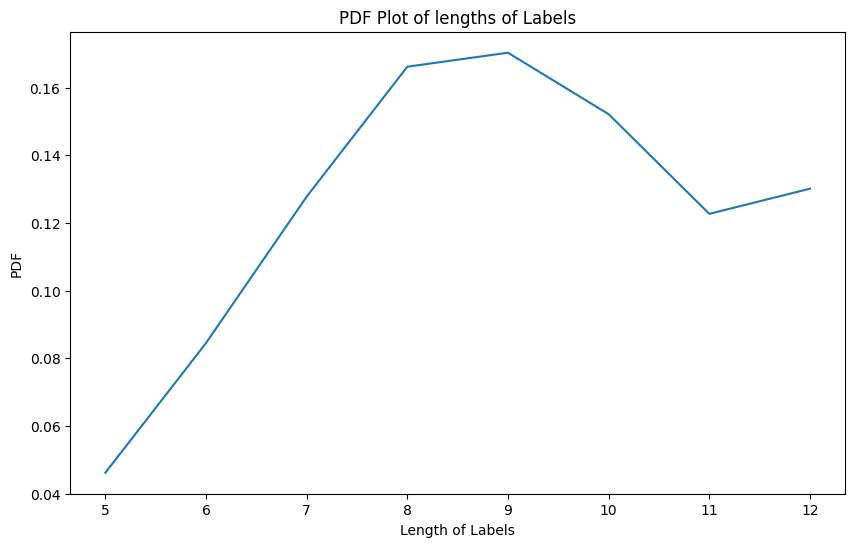

----------------------------------------------------------------------------------------------------
Maximum Length of Label:  12
----------------------------------------------------------------------------------------------------


In [87]:
pdf_label_lengths(train_label_len)

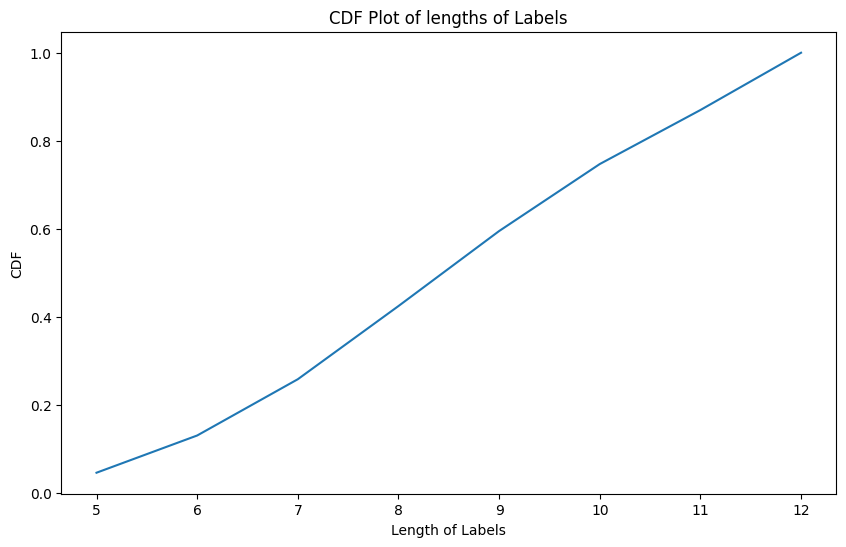

In [88]:
cdf_label_lengths(train_label_len)

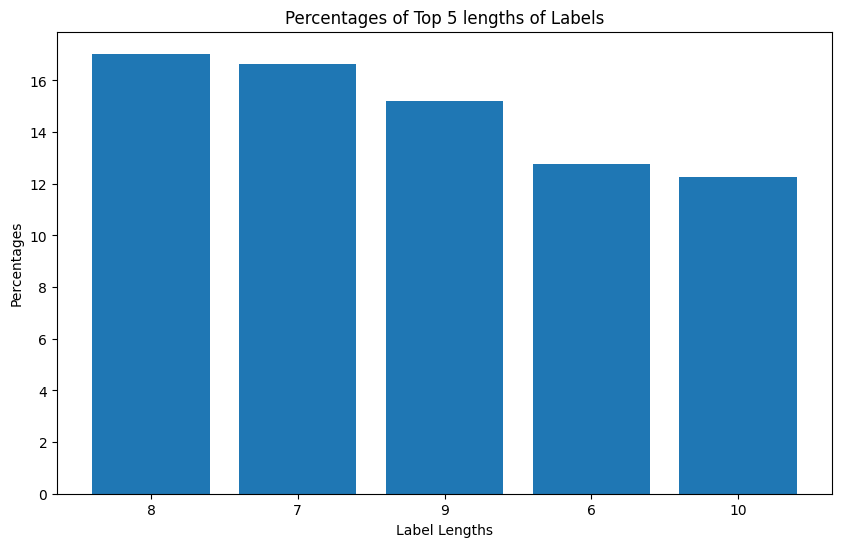

In [89]:
top_5_lengths_percentage(train_top_keys,train_top_values,len(train_label_len))

In [90]:
train_labels=[str(x) for x in train_data['Labels'].values]
digit_count(train_labels,len(train_labels))

Labels with Digits:  0.09503046564928168  %
Labels without Digits:  99.90496953435071  %


#### 7.2.2. Validation Data

In [91]:
val_data=pd.read_csv('Validation_data.csv')

In [92]:
val_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [93]:
val_label_len=[len(str(x)) for x in val_data['Labels'].values]

In [94]:
val_label_len_dict=Counter(val_label_len)

In [95]:
val_label_len_dict

Counter({8: 194,
         11: 87,
         5: 96,
         10: 136,
         9: 181,
         6: 132,
         7: 177,
         4: 47,
         12: 57})

In [96]:
val_keys = [k for k in sorted(val_label_len_dict, key=val_label_len_dict.get, reverse=True)]

In [97]:
val_top_keys=val_keys[:5]
val_top_values=[val_label_len_dict.get(k) for k in val_top_keys]

**Validation Data Label Lengths PDF**

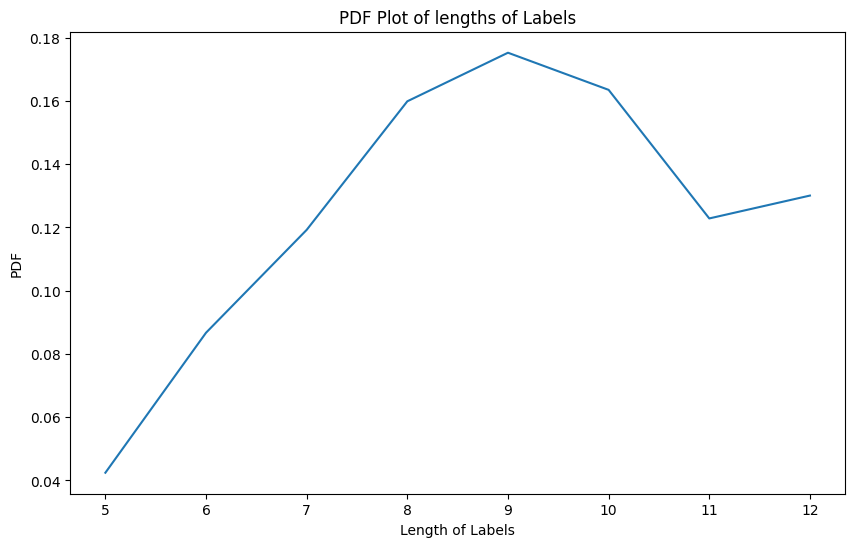

----------------------------------------------------------------------------------------------------
Maximum Length of Label:  12
----------------------------------------------------------------------------------------------------


In [98]:
pdf_label_lengths(val_label_len)

**Validation Data Label Lengths CDF**

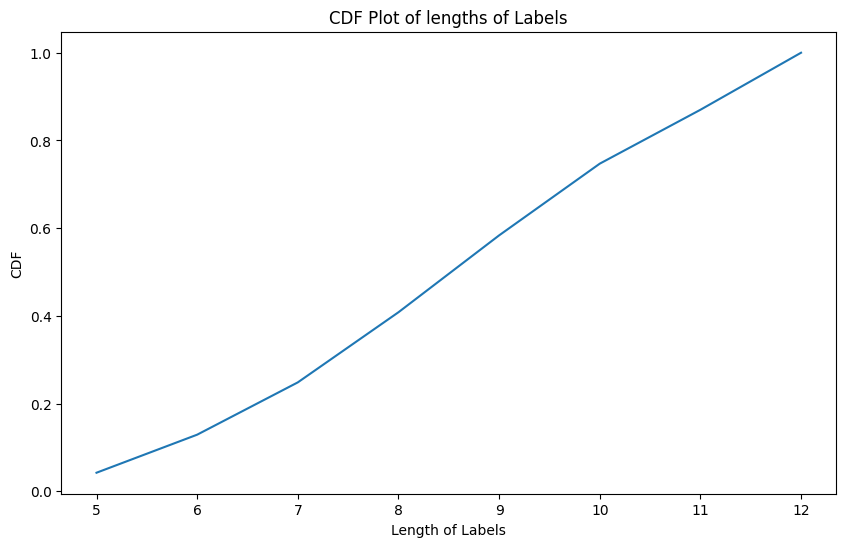

In [99]:
cdf_label_lengths(val_label_len)

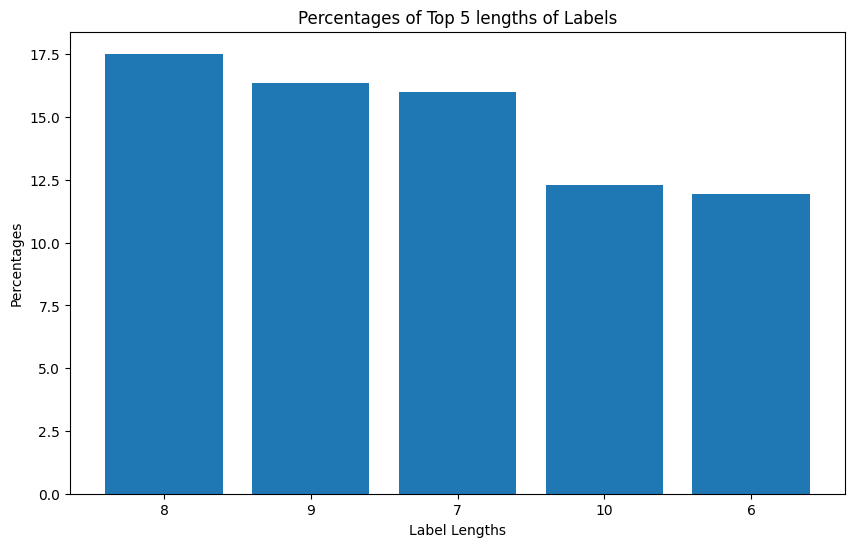

In [100]:
top_5_lengths_percentage(val_top_keys,val_top_values,len(val_label_len))

In [101]:
val_labels=[str(x) for x in val_data['Labels'].values]
digit_count(val_labels,len(val_labels))

Labels with Digits:  0.0  %
Labels without Digits:  100.0  %


#### 7.2.3. Test Data

In [102]:
test_data=pd.read_csv('Test_data.csv')

In [103]:
test_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [104]:
test_label_len=[len(str(x)) for x in test_data['Labels'].values]

In [105]:
test_label_len_dict=Counter(test_label_len)

In [106]:
test_label_len_dict

Counter({7: 219,
         9: 225,
         12: 67,
         11: 119,
         5: 120,
         6: 165,
         10: 175,
         4: 64,
         8: 232})

In [107]:
test_keys = [k for k in sorted(test_label_len_dict, key=test_label_len_dict.get, reverse=True)]

In [108]:
test_top_keys=test_keys[:5]
test_top_values=[test_label_len_dict.get(k) for k in test_top_keys]

**Test Data Label Lengths PDF**

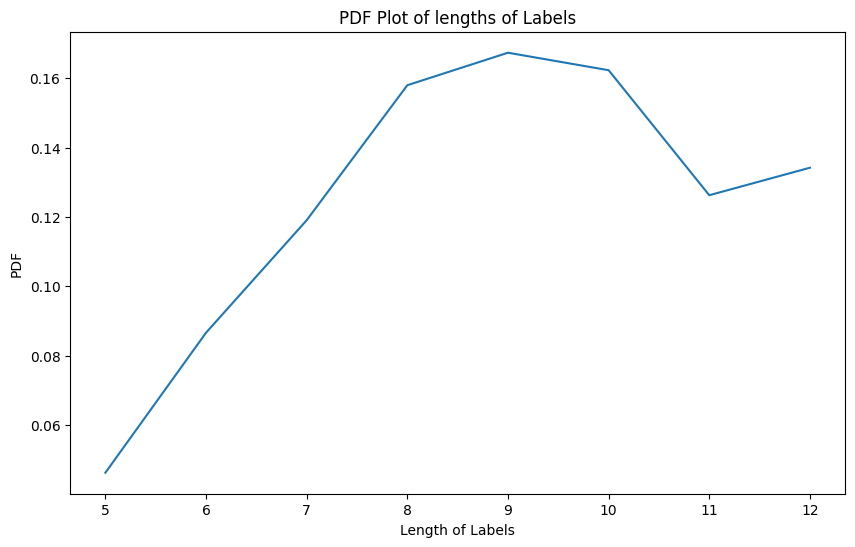

----------------------------------------------------------------------------------------------------
Maximum Length of Label:  12
----------------------------------------------------------------------------------------------------


In [109]:
pdf_label_lengths(test_label_len)

**Observations:**
1. Most of the Labels in Test Data have lengths 8,9 and 10
2. Labels with length less than 7 are very less compared to labels of other lengths in Test Data

**Test Data Label Lengths CDF**

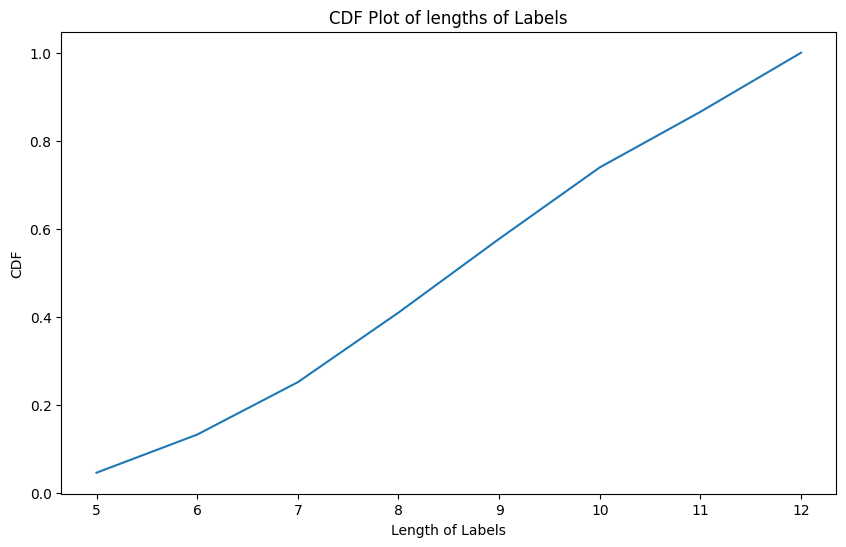

In [110]:
cdf_label_lengths(test_label_len)

**Observations:**
1. Almost 60% of the Labels have length less than 9 in Test Data
2. Very less number of labels have length less than 6 comprising less than 20% of all Test Data

**Test Data Top 5 Label Lengths Count(%) Bar Graph**

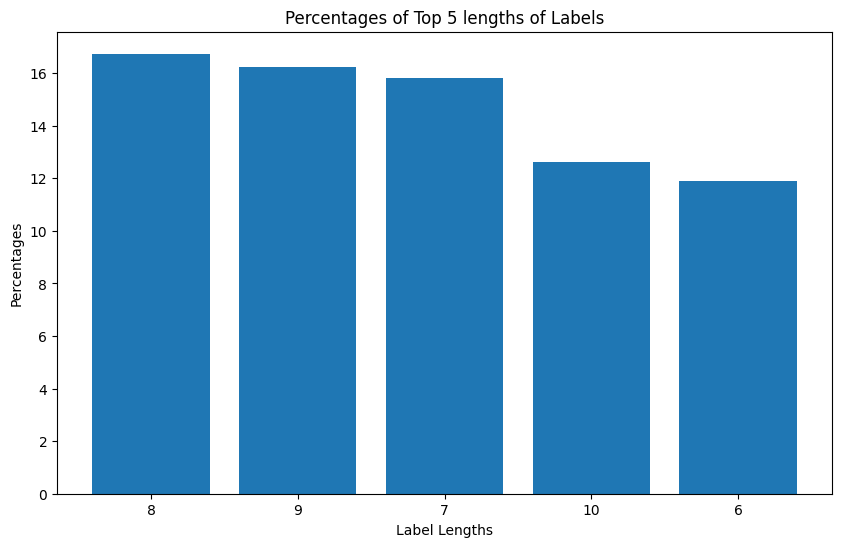

In [111]:
top_5_lengths_percentage(test_top_keys,test_top_values,len(test_label_len))

**Observations:**
1. Highest number of Labels in Test Data have lengths 7 and 8 comprising more than 16% each of the Total Test Data
2. Top 5 Label lengths in Test Data are between 6 and 10 both inclusive

**Test Data Digit Presence Percentage**

In [112]:
test_labels=[str(x) for x in test_data['Labels'].values]
digit_count(test_labels,len(test_labels))

Labels with Digits:  0.07215007215007214  %
Labels without Digits:  99.92784992784993  %


In [113]:
train_data=pd.read_csv('Train_Final.csv')
val_data=pd.read_csv('Validation_Final.csv')
test_data=pd.read_csv('Test_Final.csv')

In [114]:
letters='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
train_labels_combined=' '.join([str(x) for x in train_data['Labels'].values])
val_labels_combined=' '.join([str(x) for x in val_data['Labels'].values])
test_labels_combined=' '.join([str(x) for x in test_data['Labels'].values])

In [115]:
def letters_list(letter,combined_labels):
    letter_list=[]
    for i in range(len(letter)):
        if letter[i] in combined_labels:
            letter_list.append(letter[i])
    return letter_list

In [116]:
train_letter_set=set(letters_list(letters,train_labels_combined))
val_letter_set=set(letters_list(letters,val_labels_combined))
test_letter_set=set(letters_list(letters,test_labels_combined))

In [117]:
print("Number of unique Letters in Train Data: ",len(train_letter_set))
print("Number of unique Letters in Validation Data: ",len(val_letter_set))
print("Number of unique Letters in Test Data: ",len(test_letter_set))

Number of unique Letters in Train Data:  26
Number of unique Letters in Validation Data:  26
Number of unique Letters in Test Data:  26


In [118]:
import keras
import random
from keras import backend as K
import warnings
warnings.filterwarnings("ignore")

In [119]:
letters= '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [120]:
img_h=32
img_w=170
img_c=1
num_classes=len(letters)+1
batch_size=64 
max_length=15

In [121]:
def encode_words_labels(word):
    label_lst=[]
    for char in word:
        label_lst.append(letters.find(char))
    return label_lst

In [122]:
def words_from_labels(labels):
    txt=[]
    for ele in labels:
        if ele == len(letters): 
            txt.append("")
        else:
            txt.append(letters[ele])
    return "".join(txt)

In [123]:
def ctc_loss_function(args):
    y_pred, y_true, input_length, label_length = args 
    y_pred = y_pred[:, 2:, :]
    return K.ctc_batch_cost(y_true, y_pred, input_length, label_length)   

## 9. Data Generation

Since the CTC loss fuction computed using Keras Backend ctc_batch_cost function requires 4 inputs, we build a **Data genearator class** and define the parameters for our input image and also process the 4 inputs which needs to be passed to the model for computing CTC loss

In [124]:
class DataGenerator(keras.callbacks.Callback):
    def __init__(self, img_dirpath, img_w, img_h,
                 batch_size,n,output_labels,max_text_len=15):
        self.img_h = img_h                   
        self.img_w = img_w                  
        self.batch_size = batch_size        
        self.max_text_len = max_text_len     
        self.n=n
        self.img_dir = img_dirpath[:self.n]   
        self.indexes = list(range(self.n))  
        self.cur_index = 0                 
        self.imgs = np.zeros((self.n, self.img_h, self.img_w))
        self.texts =  output_labels[:self.n]                 

   
    def build_data(self):
        print(self.n, " Image Loading start...")
        for i, img_file in enumerate(self.img_dir):
            img = cv2.imread(img_file)
            img = img[:,:,1]                              
            img = cv2.resize(img, (self.img_w, self.img_h))
            img = img /255
            self.imgs[i, :, :]= img
            if i%10000==0:
                print("Loaded Images: ",i)
        print("Loaded Images: ",i)   
        print("Number of Texts matches with Total Number of Images :",len(self.texts) == self.n)
        print(self.n, " Image Loading finish...")


    def next_data(self): 
        self.cur_index += 1
        if self.cur_index >= self.n:
            self.cur_index = 0
            random.shuffle(self.indexes)
        return self.imgs[self.indexes[self.cur_index]], self.texts[self.indexes[self.cur_index]]

    def next_batch(self):
        while True:
            X_data = np.ones([self.batch_size, self.img_w, self.img_h, 1]) 
            Y_data = np.ones([self.batch_size, self.max_text_len])* -1      
            input_length = np.ones((self.batch_size, 1)) * 40
            label_length = np.zeros((self.batch_size, 1))                 
            source_str=[]                                                
            for i in range(self.batch_size):
                img, text = self.next_data()
                img=img.T
                img = np.expand_dims(img, -1) 
                X_data[i] = img
                label=encode_words_labels(text)
                lbl_len=len(label)
                Y_data[i,0:lbl_len] = label
                label_length[i] = len(label)
                source_str.append(text) 
            inputs = {
                'img_input': X_data,  
                'ground_truth_labels': Y_data,  
                'input_length': input_length,  
                'label_length': label_length,
                'source_str': source_str 
            }
            outputs = {'ctc': np.zeros([self.batch_size])}  
            yield (inputs, outputs) 

In [125]:
from keras.layers import Input, Conv2D, MaxPool2D, Dense,MaxPooling2D
from keras.layers import AveragePooling2D, Flatten, Activation, Bidirectional
from keras.layers import BatchNormalization, Dropout
from keras.layers import Concatenate, Add, Multiply, Lambda
from keras.layers import UpSampling2D, Reshape
from keras.layers import Reshape
from keras.models import Model
import tensorflow as tf
'''
from keras.layers.merge import add,concatenate
from keras.layers.recurrent import LSTM,GRU
'''
from keras.layers import concatenate
from keras.layers import LSTM,GRU

In [126]:
def Image_text_recogniser_model_1(stage,drop_out_rate=0.35):
    if K.image_data_format() == 'channels_first':
        input_shape = (1, img_w, img_h)
    else:
        input_shape = (img_w, img_h, 1)
       
    model_input=Input(shape=input_shape,name='img_input',dtype='float32')

    model = Conv2D(64, (3, 3), padding='same', name='conv1', kernel_initializer='he_normal')(model_input) 
    model = BatchNormalization()(model)
    model = Activation('relu')(model)
    model = MaxPooling2D(pool_size=(2, 2), name='max1')(model) 

    model = Conv2D(128, (3, 3), padding='same', name='conv2', kernel_initializer='he_normal')(model) 
    model = BatchNormalization()(model)
    model = Activation('relu')(model)
    model = MaxPooling2D(pool_size=(2, 2), name='max2')(model) 

    model = Conv2D(256, (3, 3), padding='same', name='conv3', kernel_initializer='he_normal')(model) 
    model = BatchNormalization()(model)
    model = Activation('relu')(model)
    model = Conv2D(256, (3, 3), padding='same', name='conv4', kernel_initializer='he_normal')(model)
    model=Dropout(drop_out_rate)(model)
    model = BatchNormalization()(model)
    model = Activation('relu')(model)
    model = MaxPooling2D(pool_size=(1, 2), name='max3')(model)  

    model = Conv2D(512, (3, 3), padding='same', name='conv5', kernel_initializer='he_normal')(model) 
    model = BatchNormalization()(model)
    model = Activation('relu')(model)
    model = Conv2D(512, (3, 3), padding='same', name='conv6')(model)
    model=Dropout(drop_out_rate)(model)
    model = BatchNormalization()(model)
    model = Activation('relu')(model)
    model = MaxPooling2D(pool_size=(1, 2), name='max4')(model) 

    model = Conv2D(512, (2, 2), padding='same', kernel_initializer='he_normal', name='con7')(model)
    model=Dropout(0.25)(model)
    model = BatchNormalization()(model)
    model = Activation('relu')(model)    

    model = Reshape(target_shape=((42, 1024)), name='reshape')(model)  
    model = Dense(64, activation='relu', kernel_initializer='he_normal', name='dense1')(model)  

    model=Bidirectional(LSTM(256, return_sequences=True, kernel_initializer='he_normal'), merge_mode='sum')(model)
    model=Bidirectional(LSTM(256, return_sequences=True, kernel_initializer='he_normal'), merge_mode='concat')(model)

    model = Dense(num_classes, kernel_initializer='he_normal',name='dense2')(model) 
    y_pred = Activation('softmax', name='softmax')(model)

    
    labels = Input(name='ground_truth_labels', shape=[max_length], dtype='float32') 
    input_length = Input(name='input_length', shape=[1], dtype='int64') 
    label_length = Input(name='label_length', shape=[1], dtype='int64') 

    loss_out = Lambda(ctc_loss_function, output_shape=(1,),name='ctc')([y_pred, labels, input_length, label_length]) #(None, 1)

    if stage=='train':
        return model_input,y_pred,Model(inputs=[model_input, labels, input_length, label_length], outputs=loss_out)
    else:
        return Model(inputs=[model_input], outputs=y_pred)        

In [127]:
model_input,y_pred,img_text_recog=Image_text_recogniser_model_1('train')

In [128]:
test_func = K.function([model_input], [y_pred])

In [129]:
img_text_recog.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img_input (InputLayer)         [(None, 170, 32, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv1 (Conv2D)                 (None, 170, 32, 64)  640         ['img_input[0][0]']              
                                                                                                  
 batch_normalization (BatchNorm  (None, 170, 32, 64)  256        ['conv1[0][0]']                  
 alization)                                                                                       
                                                                                              

In [130]:
def decode_batch(test_func, word_batch):
    out = test_func([word_batch])[0] 
    ret = []
    for j in range(out.shape[0]):
        out_best = list(np.argmax(out[j, 2:], 1))
        out_best = [k for k, g in itertools.groupby(out_best)]
        outstr = words_from_labels(out_best)
        ret.append(outstr)
    return ret

In [131]:
def accuracies(actual_labels,predicted_labels,is_train):
    accuracy=0
    letter_acc=0
    letter_cnt=0
    count=0
    for i in range(len(actual_labels)):
        predicted_output=predicted_labels[i]
        actual_output=actual_labels[i]
        count+=1
        for j in range(min(len(predicted_output),len(actual_output))):
            if predicted_output[j]==actual_output[j]:
                letter_acc+=1
        letter_cnt+=max(len(predicted_output),len(actual_output))
        if actual_output==predicted_output:
            accuracy+=1
    final_accuracy=np.round((accuracy/len(actual_labels))*100,2)
    final_letter_acc=np.round((letter_acc/letter_cnt)*100,2)
    return final_accuracy,final_letter_acc

**CallBacks**

In [132]:
class VizCallback(keras.callbacks.Callback):
    def __init__(self, test_func, text_img_gen,is_train,acc_compute_batches):
        self.test_func = test_func
        self.text_img_gen = text_img_gen
        self.is_train=is_train               
        self.acc_batches=acc_compute_batches 

    def show_accuracy_metrics(self,num_batches):
        accuracy=0
        letter_accuracy=0
        batches_cnt=num_batches
        while batches_cnt>0:
            word_batch = next(self.text_img_gen)[0]  
            decoded_res = decode_batch(self.test_func,word_batch['img_input'])
            actual_res=word_batch['source_str']
            acc,let_acc=accuracies(actual_res,decoded_res,self.is_train)
            accuracy+=acc
            letter_accuracy+=let_acc
            batches_cnt-=1
        accuracy=accuracy/num_batches
        letter_accuracy=letter_accuracy/num_batches
        if self.is_train:
            print("Train Average Accuracy of "+str(num_batches)+" Batches: ",np.round(accuracy,2)," %")
            print("Train Average Letter Accuracy of "+str(num_batches)+" Batches: ",np.round(letter_accuracy,2)," %")
        else:
            print("Validation Average Accuracy of "+str(num_batches)+" Batches: ",np.round(accuracy,2)," %")
            print("Validation Average Letter Accuracy of "+str(num_batches)+" Batches: ",np.round(letter_accuracy,2)," %")
            
        
    def on_epoch_end(self, epoch, logs={}):
        self.show_accuracy_metrics(self.acc_batches)
        

In [133]:
%load_ext tensorboard

In [134]:
import datetime

In [135]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
early_stop=EarlyStopping(monitor='val_loss',patience=2,restore_best_weights=True)
model_chk_pt=ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', save_best_only=False,save_weights_only=True,verbose=0, mode='auto', period=2)

In [136]:
logdir = os.path.join("logs_127", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [137]:
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [138]:
# %tensorboard --logdir logs_127

**Labels Loading**

In [139]:
Train_labels=[str(x) for x in train_data['Labels'].values]

In [140]:
train_paths=[str(x) for x in train_data['ImageName'].values]

In [141]:
train_nan_cnt=0
train_nan_replaced=False
for i in range(len(Train_labels)):
    if Train_labels[i]=='nan':
        Train_labels[i]='NULL'
        train_nan_replaced=True
        train_nan_cnt+=1

In [142]:
print('Was there any NULL values written as Nan in Train Data:',train_nan_replaced)
print('Train Nan count: ',train_nan_cnt)

Was there any NULL values written as Nan in Train Data: False
Train Nan count:  0


In [143]:
cv_labels=[str(x) for x in val_data['Labels'].values]

In [144]:
val_path=[str(x) for x in val_data['ImageName'].values]

In [145]:
val_nan_cnt=0
val_nan_replaced=False
for i in range(len(cv_labels)):
    if cv_labels[i]=='nan':
        cv_labels[i]='NULL'
        val_nan_replaced=True
        val_nan_cnt+=1

In [146]:
print('Was there any NULL values written as Nan :',val_nan_replaced)
print('Validation Nan count: ',val_nan_cnt)

Was there any NULL values written as Nan : False
Validation Nan count:  0


**Instatiating Data Generator**

In [147]:
train_gene=DataGenerator(train_paths,img_w, img_h,batch_size,17888,Train_labels)

In [148]:
train_gene.build_data()

17888  Image Loading start...
Loaded Images:  0
Loaded Images:  10000
Loaded Images:  17887
Number of Texts matches with Total Number of Images : True
17888  Image Loading finish...


In [149]:
train_num_batches=int(train_gene.n / batch_size)

In [150]:
viz_cb_train = VizCallback( test_func, train_gene.next_batch(),True,train_num_batches)

In [151]:
val_gen=DataGenerator(val_path,img_w, img_h,batch_size,1106,cv_labels)

In [152]:
val_gen.build_data()

1106  Image Loading start...
Loaded Images:  0
Loaded Images:  1105
Number of Texts matches with Total Number of Images : True
1106  Image Loading finish...


In [153]:
val_num_batches=int(val_gen.n / batch_size)

In [154]:
viz_cb_val = VizCallback( test_func, val_gen.next_batch(),False,val_num_batches)

In [155]:
from keras import optimizers
adam=optimizers.Adam()

In [156]:
img_text_recog.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=adam)

In [157]:
print(tej)

NameError: name 'tej' is not defined

### 12.1.1. Train Model 1

In [158]:
img_text_recog.fit_generator(generator=train_gene.next_batch(),
                    steps_per_epoch=int(train_gene.n / batch_size),
                    epochs=30,
                    callbacks=[viz_cb_train,viz_cb_val,train_gene,val_gen,tensorboard_callback,early_stop,model_chk_pt],
                    validation_data=val_gen.next_batch(),
                    validation_steps=int(val_gen.n / batch_size))
#callbacks=[viz_cb_train,viz_cb_val,train_gene,val_gen,tensorboard_callback,early_stop,model_chk_pt],

Epoch 1/30
279/279 [==============================] - ETA: 0s - loss: 24.9652Train Average Accuracy of 279 Batches:  0.0  %
Train Average Letter Accuracy of 279 Batches:  1.13  %
Validation Average Accuracy of 17 Batches:  0.0  %
Validation Average Letter Accuracy of 17 Batches:  1.01  %
279/279 [==============================] - 1134s 4s/step - loss: 24.9652 - val_loss: 24.9118
Epoch 2/30
279/279 [==============================] - ETA: 0s - loss: 21.9595Train Average Accuracy of 279 Batches:  0.0  %
Train Average Letter Accuracy of 279 Batches:  1.92  %
Validation Average Accuracy of 17 Batches:  0.0  %
Validation Average Letter Accuracy of 17 Batches:  1.75  %
279/279 [==============================] - 1125s 4s/step - loss: 21.9595 - val_loss: 28.0149
Epoch 3/30
279/279 [==============================] - ETA: 0s - loss: 9.9319Train Average Accuracy of 279 Batches:  19.52  %
Train Average Letter Accuracy of 279 Batches:  57.6  %
Validation Average Accuracy of 17 Batches:  16.73  %
Val

In [159]:
img_text_recog.save('Best_Img_recog_LSTM_Adam_model_run_weights.h5')

In [160]:
img_text_recog.save('Img_recog_LSTM_Adam_model_run_3.h5')

In [161]:
print(tej)

NameError: name 'tej' is not defined

In [176]:
import itertools

In [177]:
def decode_label(out):
    out_best = list(np.argmax(out[0,2:], axis=1))

    out_best = [k for k, g in itertools.groupby(out_best)] 

    outstr=words_from_labels(out_best)
    return outstr

In [178]:
def test_data_output_Prediction(model,test_img_names,test_labels):
    start=datetime.now()
    accuracy=0
    letter_acc=0
    letter_cnt=0
    count=0
    letter_mis_match=[]
    for i in range(len(test_labels)):
        test_img=cv2.imread(test_img_names[i])
        test_img_resized=cv2.resize(test_img,(170,32))
        test_image=test_img_resized[:,:,1]
        test_image=test_image.T
        test_image=np.expand_dims(test_image,axis=-1)
        test_image=np.expand_dims(test_image, axis=0)
        test_image=test_image/255
        model_output=model.predict(test_image)
        predicted_output=decode_label(model_output)
        actual_output=test_labels[i]
        count+=1
        mis_match=0
        for j in range(min(len(predicted_output),len(actual_output))):
            if predicted_output[j]==actual_output[j]:
                letter_acc+=1
            else:
                mis_match+=1
        letter_cnt+=max(len(predicted_output),len(actual_output))
        letter_mis_match.append(mis_match)
        if actual_output==predicted_output:
            accuracy+=1
        if (count%1000)==0:
            print("Processed ",count," Images")
    print("Time Taken for Processing: ",datetime.now()-start)
    return accuracy,letter_acc,letter_cnt,letter_mis_match

In [179]:
model=Image_text_recogniser_model_1('predict')

In [180]:
model.load_weights('Best_Img_recog_LSTM_Adam_model_run_weights.h5')

**Synth Text Validation Data Prediction**

In [181]:
from datetime import datetime

In [182]:
val_img_names=val_data['ImageName'].values
val_labels=val_data['Labels'].values

In [183]:
synth_val_accuracy,synth_val_letter_acc,synth_val_letter_cnt,synth_val_mis_match=test_data_output_Prediction(model,val_img_names,val_labels)

1/1 [==============================] - 0s 47ms/step
Processed  1000  Images
1/1 [==============================] - 0s 45ms/step
Time Taken for Processing:  0:02:36.651938


In [184]:
print("Model Output Accuracy: ",(synth_val_accuracy/len(val_labels))*100, " %")
print("Model Output Letter Accuracy: ",(synth_val_letter_acc/synth_val_letter_cnt)*100, " %")

Model Output Accuracy:  67.20867208672087  %
Model Output Letter Accuracy:  83.83724851073396  %


In [185]:
from collections import Counter

In [186]:
model_1_val_mis_match_dict=Counter(synth_val_mis_match)

**Model 1 Validation Data Prediction Analysis upto 4 Character Mis-Matches**

In [187]:
mis_match_cnts_1=[]
for i in range(5):
    mis_match_cnts_1.append(model_1_val_mis_match_dict[i])

In [188]:
def mis_match_character_analysis_plot(mis_match_counts,num_values):
    plt.figure(figsize=(10,6))
    indices=np.arange(len(mis_match_counts))
    counts=np.array(mis_match_counts)
    percent=(counts/num_values)*100
    plt.bar(indices,percent)
    plt.xlabel('Number of Mis-Match Characters',fontsize=10)
    plt.ylabel('Percentages',fontsize=10)
    plt.title('Percentages of Number of Mis-Match Characters',fontsize=12)
    plt.xticks(indices,indices)
    plt.show()
    for i in range(len(indices)):
        print(i," Mis-Match Characters Percentage: ",np.round(percent[i],2)," %")

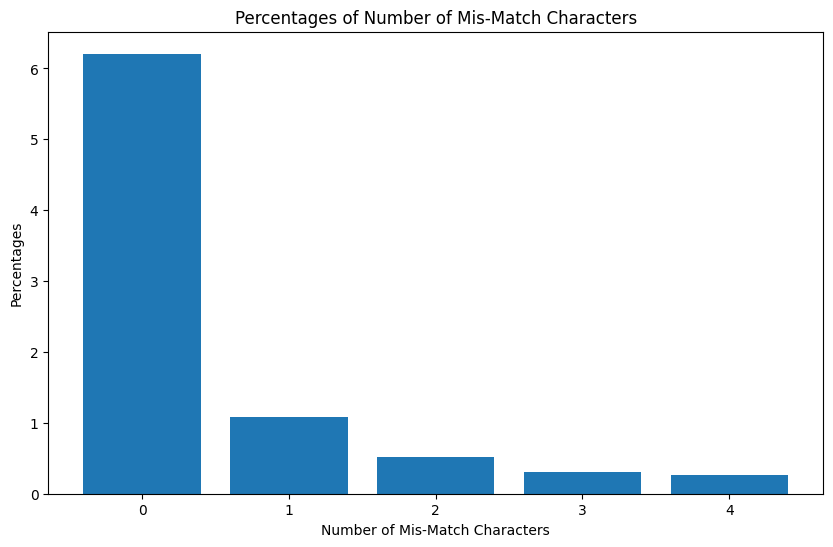

0  Mis-Match Characters Percentage:  6.21  %
1  Mis-Match Characters Percentage:  1.08  %
2  Mis-Match Characters Percentage:  0.52  %
3  Mis-Match Characters Percentage:  0.31  %
4  Mis-Match Characters Percentage:  0.26  %


In [189]:
mis_match_character_analysis_plot(mis_match_cnts_1,12000)

**Synth Text Test Data**

In [190]:
test_img_names=test_data['ImageName'].values
test_labels=test_data['Labels'].values

In [191]:
synth_test_accuracy,synth_test_letter_acc,synth_test_letter_cnt,synth_test_mis_match=test_data_output_Prediction(model,test_img_names,test_labels)

1/1 [==============================] - 0s 71ms/step
Processed  1000  Images
1/1 [==============================] - 0s 43ms/step
Time Taken for Processing:  0:03:18.981145


In [192]:
print("Model Output Accuracy: ",(synth_test_accuracy/len(test_labels))*100, " %")
print("Model Output Letter Accuracy: ",(synth_test_letter_acc/synth_test_letter_cnt)*100, " %")

Model Output Accuracy:  64.06926406926407  %
Model Output Letter Accuracy:  83.57418544116328  %


In [193]:
model_1_test_mis_match_dict=Counter(synth_test_mis_match)

**Model 1 Test Data Prediction Analysis upto 4 Character Mis-Matches**

In [194]:
mis_match_cnts_2=[]
for i in range(5):
    mis_match_cnts_2.append(model_1_test_mis_match_dict[i])

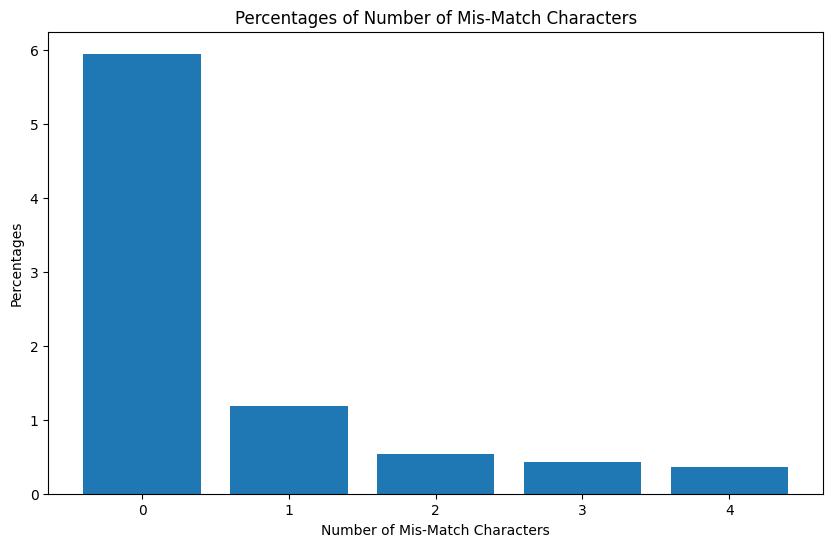

0  Mis-Match Characters Percentage:  5.95  %
1  Mis-Match Characters Percentage:  1.18  %
2  Mis-Match Characters Percentage:  0.54  %
3  Mis-Match Characters Percentage:  0.43  %
4  Mis-Match Characters Percentage:  0.37  %


In [195]:
mis_match_character_analysis_plot(mis_match_cnts_2,15000)

1. The 2 Image Text Recognition Model Architectures are Trained on 200000 Synth Text Images of Variable length Labels which are different from Validation Data containing 12000 images and Test Data Containing 15000 images.
2. Model 1 Trained on 200000 images from Synth Text Images performs reasonably well on Unseen 15000 Test Images of Variable length labels with an accuracy of ~88% and letter accuracy of ~94%
3. Model 2 also Trained on same 200000 images has an accuracy of ~82% and letter accuracy of ~93% on 15000 Test Images of Variable length labels
4. Both the Models have high percentage (>82%) of 0 mis-match character points between Actual and Predicted Labels 